In [5]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [6]:
# read dataset
df = pd.read_csv('Dealership_Data.csv')

In [7]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


# Data Summary

In [8]:
# summary of all the variable in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [9]:
# summary of numeric variables
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [10]:
# summary of numeric variables
df.describe(include = "object")

,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
unique,246,6,7,109,89,88,89,71,73,19,76,72,3
top,14/11/2018,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,USA,Freyre,Diego,Medium
freq,38,2541,949,51,259,259,259,304,259,928,259,259,1349


# Missing Values

In [11]:
df.isnull().values.any()

False

#### So no missing/nulls, moving on to Outliers

# Removing Outliers based on IQR


In [12]:
#outliers in numerical columns
def identify_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    return outliers

outliers = identify_outliers_iqr(df)
for column, count in outliers.items():
    print(f'Number of outliers in {column}: {count}')

Number of outliers in ORDERNUMBER: 0
Number of outliers in QUANTITYORDERED: 8
Number of outliers in PRICEEACH: 33
Number of outliers in ORDERLINENUMBER: 0
Number of outliers in SALES: 79
Number of outliers in DAYS_SINCE_LASTORDER: 0
Number of outliers in MSRP: 26


In [13]:
# removing outlier sidentified less than 50 and capping outliers greater than 50
# Function to identify and handle outliers
def handle_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
        
        if outliers_count < 50:
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        else:
            df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
    return df

# Apply the function to handle outliers
df_cleaned = handle_outliers(df)

# Print the cleaned DataFrame
print(df_cleaned)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

       ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP  \
0     24/02/2018            

In [14]:
# checking for outliers again after capping:
def identify_outliers_iqr(df_cleaned):
    outliers = {}
    for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)].shape[0]
    return outliers

outliers = identify_outliers_iqr(df_cleaned)
for column, count in outliers.items():
    print(f'Number of outliers in {column}: {count}')

Number of outliers in ORDERNUMBER: 0
Number of outliers in QUANTITYORDERED: 0
Number of outliers in PRICEEACH: 3
Number of outliers in ORDERLINENUMBER: 0
Number of outliers in SALES: 58
Number of outliers in DAYS_SINCE_LASTORDER: 0
Number of outliers in MSRP: 0


In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2673 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2673 non-null   int64  
 1   QUANTITYORDERED       2673 non-null   int64  
 2   PRICEEACH             2673 non-null   float64
 3   ORDERLINENUMBER       2673 non-null   int64  
 4   SALES                 2673 non-null   float64
 5   ORDERDATE             2673 non-null   object 
 6   DAYS_SINCE_LASTORDER  2673 non-null   int64  
 7   STATUS                2673 non-null   object 
 8   PRODUCTLINE           2673 non-null   object 
 9   MSRP                  2673 non-null   int64  
 10  PRODUCTCODE           2673 non-null   object 
 11  CUSTOMERNAME          2673 non-null   object 
 12  PHONE                 2673 non-null   object 
 13  ADDRESSLINE1          2673 non-null   object 
 14  CITY                  2673 non-null   object 
 15  POSTALCODE            2673

# Train and Test

In [16]:
#changing categorical to numerical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")

# 2. One-Hot Encoding for Categorical Columns
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

Categorical columns: Index(['ORDERDATE', 'STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME',
       'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')


In [17]:
#import the sklearn library
import sklearn

# import the train_test_split module from sklearn 
from sklearn.model_selection import train_test_split

In [18]:
#X = features , Y = target
X = df_encoded.drop(columns=['SALES']) 
Y = df_encoded['SALES']  

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

# Print the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2004, 939)
X_test shape: (669, 939)
Y_train shape: (2004,)
Y_test shape: (669,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

lr = LinearRegression(n_jobs = -1)
lr.fit(X_train, Y_train)

#test set results
lr_train_pred=lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

# finding the mean squared error
lr_train_mape = mean_absolute_percentage_error(Y_train, lr_train_pred)
lr_test_mape = mean_absolute_percentage_error(Y_test, lr_test_pred)
print(lr_train_mape)
print(lr_test_mape)

0.08149220671257451
0.10544441747015618


In [20]:
from sklearn.neighbors import KNeighborsRegressor
k_values = np.arange(1,20)
knn_train_mape_scores = []
knn_test_mape_scores = []
best_k=0
lowest_diff_test_train_mape=1

In [21]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    knn_train_pred = knn.predict(X_train)
    knn_test_pred = knn.predict(X_test)
    
    knn_train_mape = mean_absolute_percentage_error(Y_train, knn_train_pred)
    knn_test_mape = mean_absolute_percentage_error(Y_test, knn_test_pred)
    print('k: ',k,'Train Mape: ',knn_train_mape,'Test Mape: ',knn_test_mape)
    knn_train_mape_scores.append(knn_train_mape)
    knn_test_mape_scores.append(knn_test_mape)
print(best_k)

k:  1 Train Mape:  0.0 Test Mape:  0.30317408130597706
k:  2 Train Mape:  0.15526881890467878 Test Mape:  0.268597468637635
k:  3 Train Mape:  0.19335166272600673 Test Mape:  0.2656094907932434
k:  4 Train Mape:  0.2128761905320876 Test Mape:  0.2627077499726039
k:  5 Train Mape:  0.22683937716214514 Test Mape:  0.26129897756443726
k:  6 Train Mape:  0.23690796461103455 Test Mape:  0.2692689089605501
k:  7 Train Mape:  0.24726954820729183 Test Mape:  0.2736008561099944
k:  8 Train Mape:  0.2561992923412176 Test Mape:  0.2726331702152317
k:  9 Train Mape:  0.2635294896260436 Test Mape:  0.27465182303318936
k:  10 Train Mape:  0.27118909250975415 Test Mape:  0.27966984940577255
k:  11 Train Mape:  0.2765749120479562 Test Mape:  0.282950978952265
k:  12 Train Mape:  0.2824428321358817 Test Mape:  0.2844838912248833
k:  13 Train Mape:  0.287215909436082 Test Mape:  0.2877191991917336
k:  14 Train Mape:  0.2924568393272562 Test Mape:  0.28925030649403016
k:  15 Train Mape:  0.29649187530170

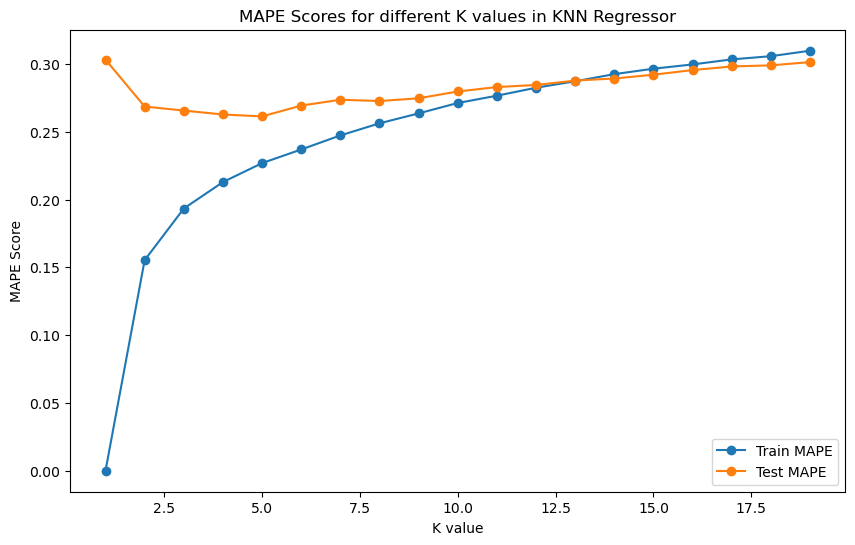

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, knn_test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

In [23]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_leaf=100)
dt.fit(X_train, Y_train)

#test set results
dt_train_pred=dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

# finding the mean squared error
dt_train_mape = mean_absolute_percentage_error(Y_train, dt_train_pred)
dt_test_mape = mean_absolute_percentage_error(Y_test, dt_test_pred)
print(dt_train_mape)
print(dt_test_mape)

0.11539950469213704
0.11123626959371544
